<a href="https://colab.research.google.com/github/SD2513/ai-assessment-1/blob/main/2407091_ShlokDhital_Assessment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
# Project setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(palette='pastel', color_codes=True,style="ticks")
sns.color_palette("pastel")

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

**Problem 1**

In [3]:
# 3.1 Problem - 1:
# Data exploration and understanding

import pandas as pd

# Read dataset
whr = pd.read_csv('drive/MyDrive/AI/WHR-2024-5CS037.csv')
# Show first 10 rows
whr.head(10)


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


In [4]:
# Print number of rows and colums
print("Number of rows:", whr.shape[0])
print("Number of columns:", whr.shape[1])
print("Shape:", whr.shape)

Number of rows: 143
Number of columns: 9
Shape: (143, 9)


In [5]:
# Print datatypes
whr.dtypes

,0
Country name,object
score,float64
Log GDP per capita,float64
Social support,float64
Healthy life expectancy,float64
Freedom to make life choices,float64
Generosity,float64
Perceptions of corruption,float64
Dystopia + residual,float64


In [6]:
# Basic Statistics

whr["score"].agg(['mean','median','std'])

,score
mean,5.527580
median,5.785000
std,1.170717


In [7]:
# Find country with highest score

whr.loc[whr["score"]== whr["score"].max(),['Country name', 'score']]

,Country name,score
0,Finland,7.741


In [8]:
# Find country with lowest score

whr.loc[whr["score"]== whr["score"].min(),['Country name', 'score']]

,Country name,score
142,Afghanistan,1.721


In [9]:
# Find number of missing values in each column of dataset

whr.isna().sum()

,0
Country name,0
score,0
Log GDP per capita,3
Social support,3
Healthy life expectancy,3
Freedom to make life choices,3
Generosity,3
Perceptions of corruption,3
Dystopia + residual,3


In [10]:
import numpy as np

whr[whr.isnull().any(axis=1)]

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
61,Bahrain,5.959,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,Tajikistan,5.281,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,State of Palestine,4.879,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Filter countries with scores greater than 7.5

highest_scores = whr.loc[whr["score"]>7.5]
display(highest_scores)
# Show the total number of countries with score greater than 7.5
print("Total: ", len(highest_scores))

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050


Total:  3


In [12]:
# Sort dataset by GDP per Capita (Descending)

highest_score_srt_gdp = highest_scores.sort_values(by='Log GDP per capita', ascending=False)
highest_score_srt_gdp.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082


In [40]:
# Add Happiness Category column

# Define categorize_happiness function
def categorize_happiness(score):
  if score < 4: return "Low"
  if score <= 6: return "Medium"
  return "High"

whr["Happiness_Category"] = whr["score"].apply(categorize_happiness)
# Show a sample to check if categorize working properly
display(whr[['Country name','score','Happiness_Category']].sample(n=10))
print("Total number of countries in each category:")
whr.groupby("Happiness_Category").size()

,Country name,score,Happiness_Category
104,Ukraine,4.873,Medium
95,Ivory Coast,5.080,Medium
123,Togo,4.214,Medium
50,Japan,6.060,High
6,Norway,7.302,High
7,Luxembourg,7.122,High
136,Botswana,3.383,Low
108,Niger,4.556,Medium
132,Yemen,3.561,Low
101,Nigeria,4.881,Medium


Total number of countries in each category:


,0
Happiness_Category,
High,56
Low,17
Medium,70


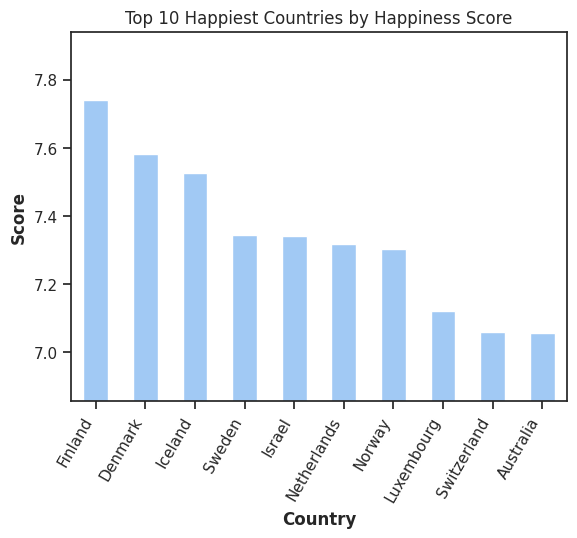

In [13]:
# 3.1 Problem - 1:
# Data Visualizations

import matplotlib.pyplot as plt

# Bar plot: Top 10 countries with highest scores
# Extract top 10 countries and plot into bar chart
top_10 = whr[['Country name', 'score']].sort_values(by='score', ascending=False).head(10)
ax = top_10.plot(kind='bar', x='Country name', y='score', legend=None)
# Enter chart title and axis labels
plt.title('Top 10 Happiest Countries by Happiness Score')
plt.xlabel('Country', fontweight="bold")
plt.ylabel('Score', fontweight="bold")
ax.set_xticks(ax.get_xticks(),
              labels = top_10['Country name'],
              ha='right',
              rotation=60
              )
# Y axis from lowest - 0.2 to highest + 0.2 so that difference in scores is seen
plt.ylim(bottom=top_10['score'].min()-0.2, top=top_10['score'].max()+0.2)
plt.show()

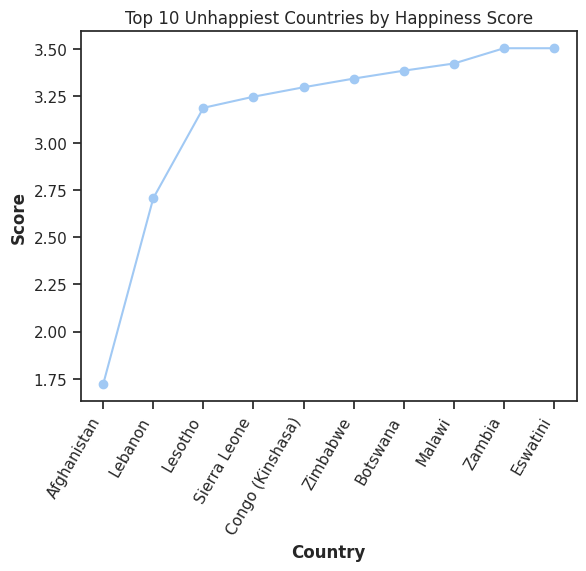

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_Category
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low
141,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,Low
140,Lesotho,3.186,0.771,0.851,0.000,0.523,0.082,0.085,0.875,Low
139,Sierra Leone,3.245,0.654,0.566,0.253,0.469,0.181,0.053,1.068,Low
138,Congo (Kinshasa),3.295,0.534,0.665,0.262,0.473,0.189,0.072,1.102,Low
137,Zimbabwe,3.341,0.748,0.850,0.232,0.487,0.096,0.131,0.797,Low
136,Botswana,3.383,1.445,0.969,0.241,0.567,0.014,0.082,0.066,Low
135,Malawi,3.421,0.617,0.410,0.349,0.571,0.135,0.136,1.203,Low
133,Zambia,3.502,0.899,0.809,0.264,0.727,0.168,0.109,0.526,Low
134,Eswatini,3.502,1.255,0.925,0.176,0.284,0.059,0.116,0.686,Low


In [42]:
# Line plot: top 10 unhappiest countries by score

# Extract 10 unhappiest countries
bottom_10 = whr.nsmallest(10,'score')
ax = bottom_10.plot(kind='line',
                  x='Country name',
                  y='score',
                  marker='o',
                  legend=None,
                  rot=60)
# Enter chart title and axis labels
plt.title('Top 10 Unhappiest Countries by Happiness Score')
plt.xlabel('Country',fontweight='bold')
plt.ylabel('Score', fontweight='bold')
ax.set_xticks(np.arange(bottom_10['Country name'].index.size),
              labels=bottom_10['Country name'],
              ha='right',
              )
plt.show()
display(bottom_10)

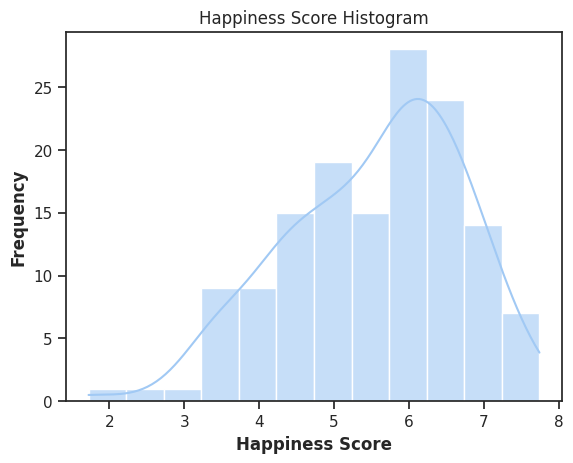

In [52]:
# Histogram: Happiness Score

# Plot histogram using seaborn

sns.histplot(whr['score'], kde=True, alpha=0.6, bins=12)
plt.xlabel('Happiness Score', fontweight="bold")
plt.ylabel('Frequency', fontweight="bold")
plt.title("Happiness Score Histogram")
plt.show()

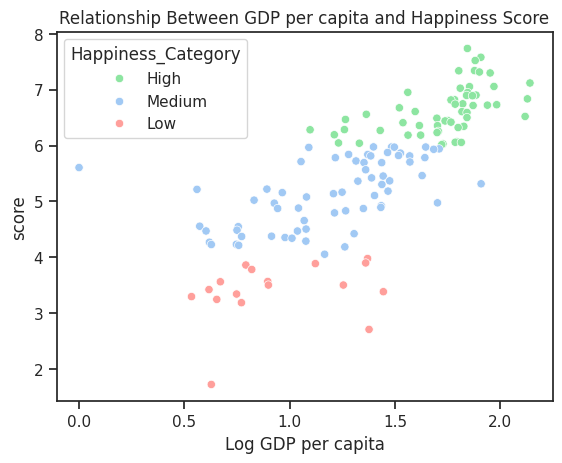

In [63]:
# Scatter plot: Score X Log GDP per capita

# Since we have 3 rows consisting of only score data, we will exclude them
# whr_exclude_na = whr[whr['Log GDP per capita'].notna()]

# Plot scatter plot using MatplotLib
# Define the colors
palette_colors = sns.color_palette("pastel")
palette = {
    "High": palette_colors[2],
    "Medium": palette_colors[0],
    "Low": palette_colors[3]
}
# Plot the data
sns.scatterplot(data=whr,x='Log GDP per capita', y='score',hue='Happiness_Category',palette=palette)
plt.title("Relationship Between GDP per capita and Happiness Score")
plt.show()



---


**Problem 2**

In [17]:
# Problem 2 - Task 1 - Setup Task - Preparing the South-Asia Dataset:

# Define south asian countries in a list
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
                         "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

# Copy the dataset with south asian countries instead of creating a subset
south_asia_whr = whr[whr['Country name'].isin(south_asian_countries)].copy()
south_asia_whr

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672


In [18]:
# Write south asian countries into separate csv for future use

south_asia_whr.to_csv('drive/MyDrive/AI/south_asia_whr.csv', index=False)

In [19]:
# Problem 2 - Task 2 - Composite Score Ranking
# Create column composite score with given formula

south_asia_whr['Composite Score'] = ((0.40 * south_asia_whr['Log GDP per capita'])
                                      + (0.30 * south_asia_whr['Social support'])
                                      + (0.30 * south_asia_whr['Healthy life expectancy']))
south_asia_whr

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Composite Score
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,0.8159
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,0.7039
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,0.7874
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,1.0739
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,0.6774
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,0.3238


In [20]:
# Rank countries based on the composite score in descending order

south_asia_sorted = south_asia_whr.sort_values(by="Composite Score", ascending=False)

south_asia_sorted

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Composite Score
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,1.0739
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,0.8159
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,0.7874
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,0.7039
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,0.6774
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,0.3238


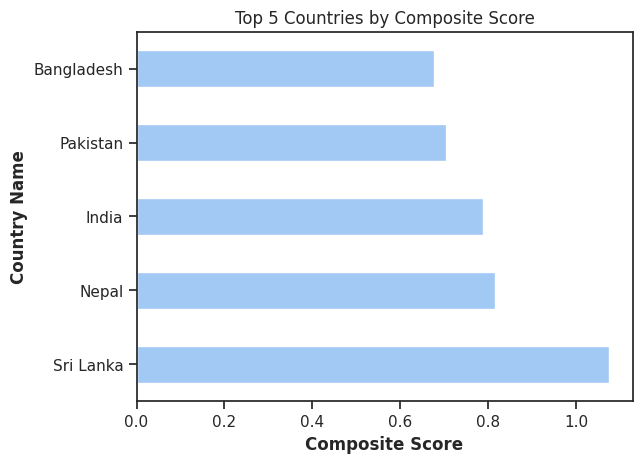

In [21]:
# Visualize top 5 countries using horizontal bar chart showing composite score

south_asia_whr.nlargest(5, 'Composite Score').plot(kind='barh',
                        x='Country name',
                        y='Composite Score',
                        legend=None,
                        title='Top 5 Countries by Composite Score')
plt.xlabel('Composite Score', fontweight="bold")
plt.ylabel('Country Name', fontweight="bold")
plt.show()

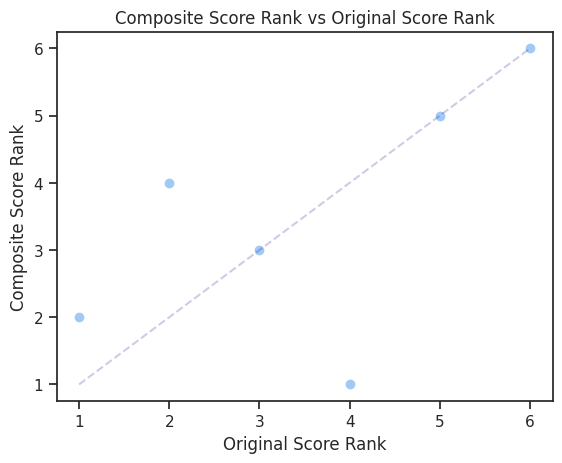

In [22]:
# Visualize whether composite score aligns with original score

# south_asia_sorted['Composite Score'].rank(ascending=False)
# south_asia_sorted['score'].rank(ascending=False)

max_rank = len(south_asia_sorted)
# Plot the line of equality: x and y
plt.plot(np.arange(1, max_rank + 1),
         np.arange(1,max_rank + 1),
         color='darkblue',
         alpha=0.2,
         linestyle='--')

# Plot the ranks of the two countries
plt.scatter(south_asia_sorted['score'].rank(ascending=False),
            south_asia_sorted['Composite Score'].rank(ascending=False),
            marker='o',
            alpha=1)

# Write the labels and titles for the plot
plt.title('Composite Score Rank vs Original Score Rank')
plt.xlabel('Original Score Rank')
plt.ylabel('Composite Score Rank')
plt.show()

In [23]:
# Problem 2 - Task 3 - Outlier detection

# Find upper and lower bounds for outliers, happiness score:

# Calculate IQR for score column
score_q1 = south_asia_whr['score'].quantile(0.25)
score_q3 = south_asia_whr['score'].quantile(0.75)
score_IQR = score_q3 - score_q1

# Set the upper and lower bounds using 1.5 * IQR
score_upper = score_q3 + (1.5 * score_IQR)
score_lower = score_q1 - (1.5 * score_IQR)

print(f"Threshold values = ({score_lower:.3f}, {score_upper:.3f})")

Threshold values = (2.963, 5.432)


In [24]:
# Find upper and lower bounds for outliers, log GDP per capita:

# Calculate IQR for log GDP per capita
gdp_q1 = south_asia_whr['Log GDP per capita'].quantile(0.25)
gdp_q3 = south_asia_whr['Log GDP per capita'].quantile(0.75)
gdp_IQR = gdp_q3 - gdp_q1

# Calculate IQR for log GDP per capita
gdp_upper = gdp_q3 + 1.5 * gdp_IQR
gdp_lower = gdp_q1 - 1.5 * gdp_IQR

print(f"Threshold values = ({gdp_lower:.3f}, {gdp_upper:.3f})")

Threshold values = (0.745, 1.401)


In [25]:
# Locate outliers

outliers = south_asia_whr.loc[((south_asia_whr['score'] > score_upper) | (south_asia_whr['score'] < score_lower) |
                     (south_asia_whr['Log GDP per capita'] > gdp_upper) | (south_asia_whr['Log GDP per capita'] < gdp_lower))]
outliers

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Composite Score
142,Afghanistan,1.721,0.628,0.0,0.242,0.0,0.091,0.088,0.672,0.3238


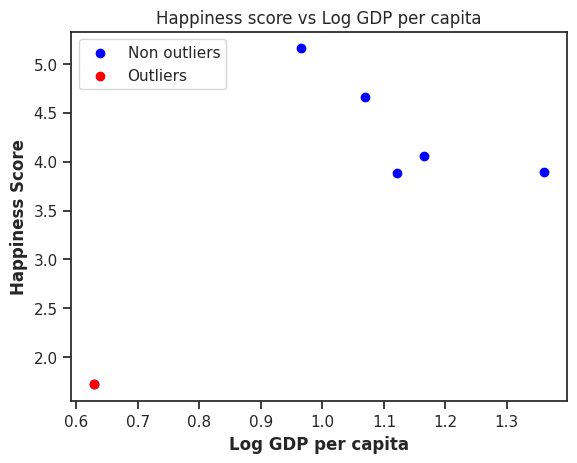

In [26]:
# Plot GDP per Capita x Score
plt.figure()
# Plot the south asian countries in blue
plt.scatter(south_asia_whr['Log GDP per capita'], south_asia_whr['score'], color='blue', label='Non outliers')
# Plot outliers in red
plt.scatter(outliers['Log GDP per capita'], outliers['score'], color='red', label="Outliers")
# Define labels and titles and show plot
plt.xlabel("Log GDP per capita", fontweight='bold')
plt.ylabel("Happiness Score", fontweight='bold')
plt.title("Happiness score vs Log GDP per capita")
plt.legend(loc='upper left')
plt.show()

In [27]:
# Problem 2 - Task 4 - Exploring trend across metrics

# Chosen metrics: Freedom to make life choices and Generosity

south_asia_whr[["score", "Freedom to make life choices", "Generosity"]].corr()

,score,Freedom to make life choices,Generosity
score,1.000000,0.800519,0.874512
Freedom to make life choices,0.800519,1.000000,0.733396
Generosity,0.874512,0.733396,1.000000


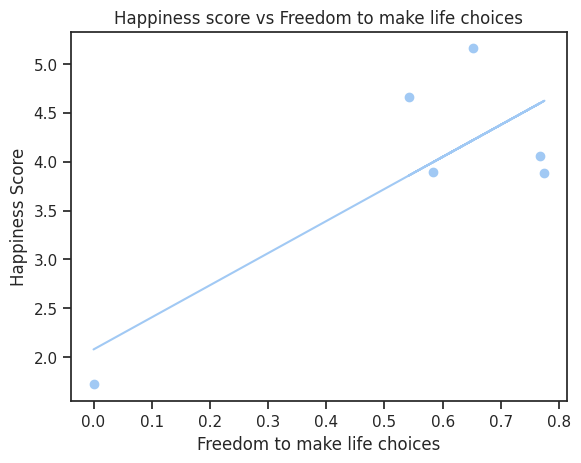

In [28]:
# Create a scatter plot for score against freedom to make life choice
x_freedom = south_asia_whr['Freedom to make life choices']
y_score = south_asia_whr['score']
plt.scatter(x=x_freedom,
            y=y_score)

# Find and plot the best fit trendline
z = np.polyfit(x_freedom, y_score,1)
p = np.poly1d(z)
plt.plot(x_freedom,p(x_freedom))

# Enter the labels and titles
plt.xlabel("Freedom to make life choices")
plt.ylabel("Happiness Score")
plt.title("Happiness score vs Freedom to make life choices")
plt.show()

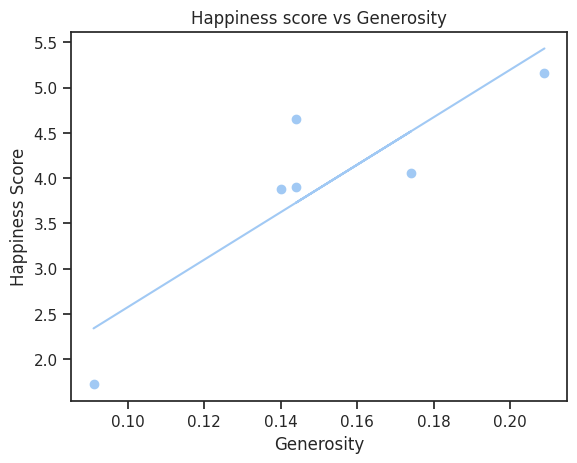

In [29]:
# Create a scatter plot for score against generosity
x_generosity = south_asia_whr['Generosity']
plt.scatter(x=x_generosity,
            y=y_score)

# Find and plot the best fit trendline
z = np.polyfit(x_generosity, y_score,1)
p = np.poly1d(z)
plt.plot(x_generosity, p(x_generosity))

plt.xlabel("Generosity")
plt.ylabel("Happiness Score")
plt.title("Happiness score vs Generosity")
plt.show()

In [30]:
# Add a new column GDP-Score gap

south_asia_whr["GDP-Score Gap"] = south_asia_whr['Log GDP per capita'] - south_asia_whr['score']
south_asia_whr

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Composite Score,GDP-Score Gap
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,0.8159,-4.193
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,0.7039,-3.588
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,0.7874,-2.888
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,1.0739,-2.537
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,0.6774,-2.764
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,0.3238,-1.093


In [31]:
# Rank countries based on gdp-score gap



---


**Problem 3**

In [32]:
# Create middle east countries dataframe

middle_east_countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait",
                         "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia",
                          "Syria", "United Arab Emirates", "Yemen"]

mid_east_whr = whr.loc[whr['Country name'].isin(middle_east_countries)].copy()
mid_east_whr

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
12,Kuwait,6.951,1.845,1.364,0.661,0.827,0.200,0.172,1.884
21,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741
27,Saudi Arabia,6.594,1.842,1.361,0.511,0.787,0.114,0.188,1.790
61,Bahrain,5.959,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,Iraq,5.166,1.249,0.996,0.498,0.425,0.141,0.048,1.809
99,Iran,4.923,1.435,1.136,0.571,0.366,0.235,0.123,1.057
124,Jordan,4.186,1.262,0.983,0.594,0.593,0.059,0.189,0.504
132,Yemen,3.561,0.671,1.281,0.293,0.362,0.080,0.113,0.760
141,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073


In [33]:
# Subtask 1 - Descriptive Statistics

# Set the region for each dataset
south_asia_whr["Region"] = "South Asia"
mid_east_whr['Region'] = "Middle East"

# Combine middle east and south asia dataframes
# Drop composite score and gdp score gap (not needed for further analysis)
mideast_southasia = pd.concat([mid_east_whr, south_asia_whr.drop(['Composite Score', 'GDP-Score Gap'],axis=1)])

display(mideast_southasia[['score','Region']].groupby(["Region"]).agg(['mean', 'std']).T)

# central_tendency = pd.DataFrame({"Middle East Score": mid_east_whr['score'].agg(['mean', 'std']),
#                                  "South Asia Score": south_asia_whr['score'].agg(['mean', 'std'])})
# display(central_tendency)


Region      Middle East  South Asia
score mean     5.412100    3.895667
      std      1.566201    1.177069

In [34]:
display(mid_east_whr[['Country name','score']].nlargest(3,'score'))
display(mid_east_whr[['Country name','score']].nsmallest(3,'score'))
display(south_asia_whr[['Country name','score']].nlargest(3,'score'))
display(south_asia_whr[['Country name','score']].nsmallest(3,'score'))

,Country name,score
4,Israel,7.341
12,Kuwait,6.951
21,United Arab Emirates,6.733


,Country name,score
141,Lebanon,2.707
132,Yemen,3.561
124,Jordan,4.186


,Country name,score
92,Nepal,5.158
107,Pakistan,4.657
125,India,4.054


,Country name,score
142,Afghanistan,1.721
128,Bangladesh,3.886
127,Sri Lanka,3.898


In [35]:
# Subtask 3 - Metric Comparisons
# Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy

key_metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']

# Check countries with null data
print("Rows with null data Middle East:", mid_east_whr[key_metrics].isna().any(axis=1).sum())
print("Rows with null data South Asia:", south_asia_whr[key_metrics].isna().any(axis=1).sum())


Rows with null data Middle East: 1
Rows with null data South Asia: 0


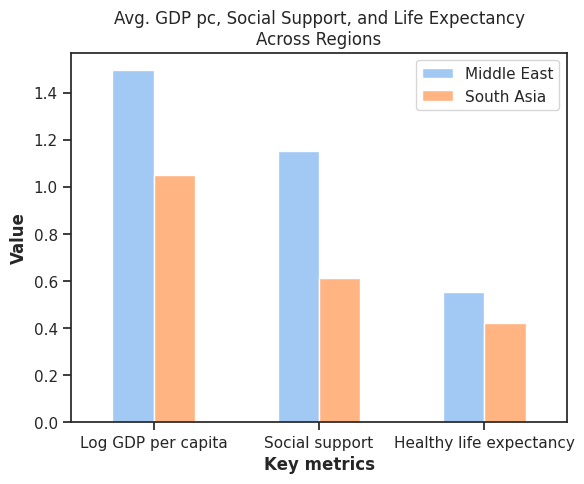

In [36]:
# Create a dataframe to compare the means of two regions
temp_dict = {"Middle East": mid_east_whr[key_metrics].mean(numeric_only=True),
             "South Asia": south_asia_whr[key_metrics].mean(numeric_only=True)}

key_comparison_df = pd.DataFrame(temp_dict)

# Plot the dataframe into a barchart
key_comparison_df.plot(kind='bar',rot=0)
plt.title("Avg. GDP pc, Social Support, and Life Expectancy\nAcross Regions")
plt.xlabel("Key metrics",fontweight='bold')
plt.ylabel("Value",fontweight='bold')
plt.show()

In [37]:
# Subtask 4 - Happiness Disparity

# Define range function
def calc_range(series):
  return series.max() - series.min()

# Define coefficient of variance function
def calc_cv(series):
  return series.std() / series.mean()

# Compute the range, cv of score values, grouped by region
# Use custom agg functions for range and cv
whr_disparity = mideast_southasia[['Region', 'score']].groupby("Region").agg(
    Score_Range=pd.NamedAgg(column="score", aggfunc=calc_range),
    Score_CV=pd.NamedAgg(column="score", aggfunc=calc_cv))

display(whr_disparity.T)

Region,Middle East,South Asia
Score_Range,4.634000,3.437000
Score_CV,0.289389,0.302148


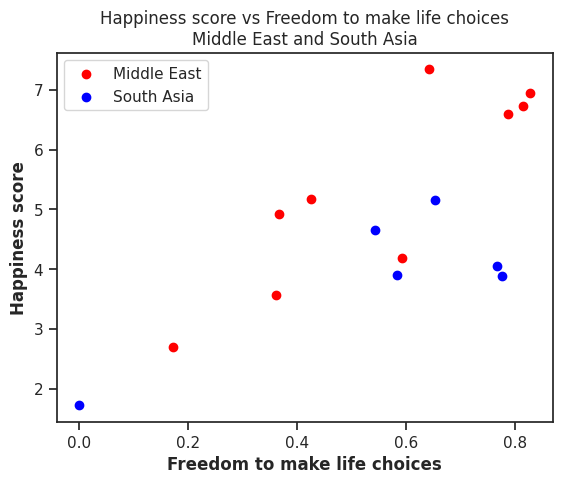

,Middle East,South Asia
Correlation Coefficient,0.86322,0.800519


In [38]:
# Subtask 5 - Correlation Analysis
# Freedom to make life choices and score

# Create scatter plots of middle east and south asia
plt.scatter(mid_east_whr['Freedom to make life choices'],
            mid_east_whr['score'],
            color = "red",
            label = "Middle East")
plt.scatter(south_asia_whr['Freedom to make life choices'],
            south_asia_whr['score'],
            color = "blue",
            label = "South Asia")

# Display titles and legend
plt.legend()
plt.xlabel("Freedom to make life choices", fontweight="bold")
plt.ylabel("Happiness score", fontweight="bold")
plt.title("Happiness score vs Freedom to make life choices\nMiddle East and South Asia")
plt.show()

# Display correlation coefficients for each
temp_dict = {"Middle East": {"Correlation Coefficient": mid_east_whr['score'].corr(mid_east_whr['Freedom to make life choices'])},
             "South Asia": {"Correlation Coefficient":south_asia_whr['score'].corr(south_asia_whr['Freedom to make life choices'])}}
display(pd.DataFrame(temp_dict))

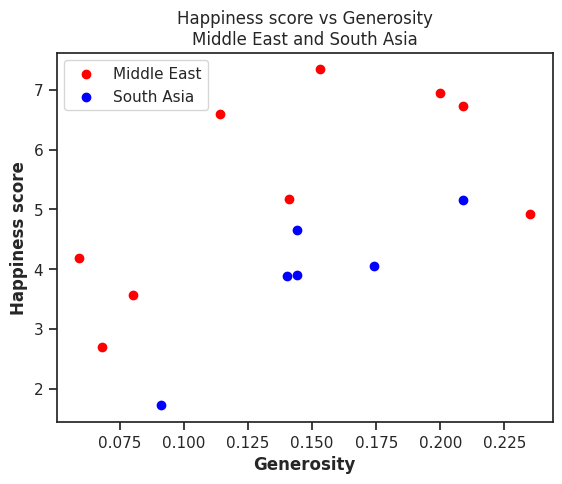

,Middle East,South Asia
Correlation Coefficient,0.627524,0.874512


In [39]:
# Generosity and score

# Create scatter plots of middle east and south asia
plt.scatter(mid_east_whr['Generosity'],
            mid_east_whr['score'],
            color = "red",
            label = "Middle East")
plt.scatter(south_asia_whr['Generosity'],
            south_asia_whr['score'],
            color = "blue",
            label = "South Asia")

# Display titles and legend
plt.legend()
plt.xlabel("Generosity", fontweight="bold")
plt.ylabel("Happiness score", fontweight="bold")
plt.title("Happiness score vs Generosity\nMiddle East and South Asia")
plt.show()

# Display correlation coefficients for each
temp_dict = {"Middle East": {"Correlation Coefficient": mid_east_whr['score'].corr(mid_east_whr['Generosity'])},
             "South Asia": {"Correlation Coefficient":south_asia_whr['score'].corr(south_asia_whr['Generosity'])}}
display(pd.DataFrame(temp_dict))